1. Mario García
– 2. Ricardo Ibarra 
– 3. Paula Pelayo

# PROYECTO MÓDULO 2

### Objetivos
#### General:
Mediante el uso de simulación Montecarlo, optimizar y maximizar las ganancias de una inversión.

#### Específico:
Utilizar la teoría del método Montecarlo, y eventualmente herramientas computacionales, para llevar a cabo un modelo de predicción en base a un portafolio de inversión, el cual necesita ser conformado mediante condiciones del cliente y probabilidades de ganancia.


### Problema:

Hay un inversionista que quiere añadir dos nuevas acciones a su portafolio de inversión, ya que cuenta con $15,000.00 (quince mil dólares USD) más para invertir en nuevas acciones. (Siguiendo con el caso propuesto en el proyecto 1). 

Al ya contar con un portafolio actual de inversión, él solo desea añadir dos nuevas acciones.

Condiciones del inversionista:

- El inversionista quiere invertir en dos sectores diferentes para mantener un portafolio variado:
 - Tecnología electrónica.
 - Comercio minorista.
 
 
- Del sector "Tecnología electrónica" tiene dos opciones para invertir:
 - Intel Corporation (INTC)
 - Cisco Systems, Inc. (CSCO)
 
 
- Del sector "Comercio minorista" tiene otras dos opciones para invertir:
 - Home Depot, Inc. (HD)
 - Costco Wholesale Corporation (COST)
 

- Desea invertir en una sola acción de cada sector.


- Desea invertir dos tercios de su nuevo capital en la acción que más probabilidad de éxito anual tenga, y el resto en la otra acción.

El objetivo es encontrar la acción con la probabilidad más alta de generar ganancias del 15%, en cada sector.

**El precio de las acciones está representado en la siguiente tabla, la cual fue recuperada de Yahoo Finance:**

Empresa|Precio de acción|Sector
:----|----|----
Intel|$\$$30.85|Tecnología electrónica
Cisco|$\$$45.96|Tecnología electrónica
Home depot|$\$$293.08|Comercio minorista
Costco|$\$$490.06|Comercio minorista

### Modelo que representa el problema

**1. Media y desviación estándar de los rendimientos**

- Para esta simulación Montecarlo se utilizará una distribución normal para generar números aleatorios y poder simular rendimientos. Por lo tanto se extraerán valores históricos de las acciones para determinar sus rendimientos y datos estadísticos.

**2. Deducción del modelo:** 

Para saber los rendimientos de cada acción, se usará el precio anterior con el actual para obtener un rendimiento logarítmico:

$r_t=\ln\left(\frac{S_t}{S_{t-1}}\right)$

Posteriormente para calcular los precios simulados teniendo los rendimientos, es la multiplicación del precio anterior por el rendimiento más 1. Al escalar esta ecuación a k número de datos, se tiene que:

$p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$


**3. Situación a representar y limitaciones:**

Con este modelo estaremos representando una aproximación de los valores futuros de una acción (en este caso a un año). De esta forma, podemos tener una idea de como se va a comportar el valor de esa acción y saber las ganancias o precios que podemos esperar.


### Solución del problema de optimización

In [11]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance
%matplotlib inline
yfinance.pdr_override()

[*********************100%***********************]  4 of 4 completed


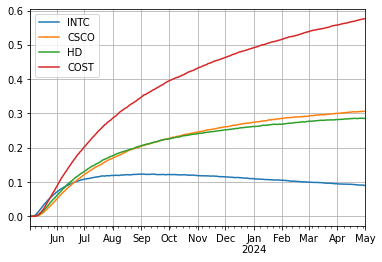

In [13]:

def get_closes(tickers, start_date=None, end_date=None):
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']
    closes= closes.sort_index()
    return closes

def sim_r(media, std, inicio, dias, N):
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=r)

tickers = ['INTC', 'CSCO', 'HD', 'COST']
acciones = get_closes(tickers, "2021-05-02", "2023-05-02")

for ticker in tickers:
    accion = acciones.loc[:, ticker]
    r = ((accion - accion.shift())/accion.shift()).dropna()
    simulacion = sim_r(r.mean(), r.std(), "2023-05-03", 365, 100000)
    precios = (1 + simulacion).cumprod()*accion[-1]
    deseado = accion[-1]*1.15
    pasa = precios >= deseado
    probabilidad = pasa.mean(axis=1)
    probabilidad.plot(grid = True, label=ticker)

plt.legend()

### Visualización de la solución del problema

Como podemos ver de la gráfica:

- Del sector Tecnología electrónica (Intel y Cisco), la acción que más probabilidad de superar un 15% tiene, es Intel.

- Del sector Comercio minorista (Home depot y Costco), la acción que más probabilidad de superar un 15% tiene, es Costco.

Entre Costco e Intel, la acción que más probabilidad de superar un 15% tiene, es Costco.

Por lo tanto, la inversión a recomendar al cliente es la siguiente:

Empresa|Sector|Precio|Monto|N. acciones
:----|----|----|----|----
Intel|Tecnología electrónica|$\$$30.8|$\$$50,000.00|1623 acciones
Cisco|Tecnología electrónica|$\$$45.96|$\$$0.00|0 acciones
Home depot|Comercio minorista|$\$$293.08|$\$$0.00|0 acciones
Costco|Comercio minorista|$\$$490.06|$\$$100,000.00|204 acciones

### Conclusión

Como conclusión, se logró encontrar una estrategia de inversión que intente lograr una mayor ganancia del inversionista, esto con base en las condiciones que él mismo propuso en un primer momento. Tanto los sectores en los que quiera invertir, como el monto que estaba dispuesto a utilizar. De esta forma, agrega acciones a su porafolio para generar más ganancias y diversificarlo. 

A pesar de llegar a un caso exitoso con las condiciones dadas, cabe aclarar y comentar al inversionista acerca de las limitaciones que la integración Montecarlo tiene al momento de hacer predicciones, ya que los datos de salida, o pronóstico, es igual de bueno que los datos de entrada, si se hace una simulación Montecarlo sencilla, probablemente los resultados no sean tan fiables. Además de no tomar en cuenta fenómenos imprevistos en el mercado bursátil que pueden cambiar el futuro de las acciones drásticamente. 

**Referencias:**

- Yahoo Finance. (s. f.). Recuperado 21 de marzo de 2023, de https://finance.yahoo.com/